In [189]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import missingno as msno
import matplotlib.pyplot as plt

In [190]:
df2021 = pd.read_csv('world-happiness-report-2021.csv')
df2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [191]:
df2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [192]:
df2021.shape

(149, 20)

In [193]:
df2021.describe().T

,count,mean,std,min,25%,50%,75%,max
Ladder score,149.0,5.532839,1.073924e+00,2.523,4.852,5.534,6.255,7.842
Standard error of ladder score,149.0,0.058752,2.200120e-02,0.026,0.043,0.054,0.070,0.173
upperwhisker,149.0,5.648007,1.054330e+00,2.596,4.991,5.625,6.344,7.904
lowerwhisker,149.0,5.417631,1.094879e+00,2.449,4.706,5.413,6.128,7.780
Logged GDP per capita,149.0,9.432208,1.158601e+00,6.635,8.541,9.569,10.421,11.647
Social support,149.0,0.814745,1.148890e-01,0.463,0.750,0.832,0.905,0.983
Healthy life expectancy,149.0,64.992799,6.762043e+00,48.478,59.802,66.603,69.600,76.953
Freedom to make life choices,149.0,0.791597,1.133318e-01,0.382,0.718,0.804,0.877,0.970
Generosity,149.0,-0.015134,1.506567e-01,-0.288,-0.126,-0.036,0.079,0.542
Perceptions of corruption,149.0,0.727450,1.792263e-01,0.082,0.667,0.781,0.845,0.939


In [194]:
df2021.corr()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Ladder score,1.000000,-0.470787,0.999347,0.999396,0.789760,0.756888,0.768099,0.607753,-0.017799,-0.421140,NaN,0.789745,0.756869,0.768138,0.607793,-0.017631,0.421205,0.492010
Standard error of ladder score,-0.470787,1.000000,-0.438612,-0.501150,-0.645799,-0.530815,-0.583805,-0.275182,0.138349,0.276997,NaN,-0.645776,-0.531010,-0.583806,-0.275171,0.138580,-0.277041,0.136827
upperwhisker,0.999347,-0.438612,1.000000,0.997489,0.777995,0.749215,0.758455,0.607797,-0.012616,-0.417560,NaN,0.777981,0.749187,0.758494,0.607838,-0.012435,0.417624,0.506880
lowerwhisker,0.999396,-0.501150,0.997489,1.000000,0.800064,0.763299,0.776364,0.606944,-0.022794,-0.423976,NaN,0.800048,0.763288,0.776402,0.606983,-0.022638,0.424042,0.477204
Logged GDP per capita,0.789760,-0.645799,0.777995,0.800064,1.000000,0.785299,0.859461,0.432323,-0.199286,-0.342337,NaN,1.000000,0.785174,0.859488,0.432383,-0.199532,0.342332,-0.041119
Social support,0.756888,-0.530815,0.749215,0.763299,0.785299,1.000000,0.723256,0.482930,-0.114946,-0.203207,NaN,0.785287,0.999996,0.723284,0.482896,-0.114913,0.203366,0.006681
Healthy life expectancy,0.768099,-0.583805,0.758455,0.776364,0.859461,0.723256,1.000000,0.461494,-0.161750,-0.364374,NaN,0.859446,0.723155,0.999999,0.461485,-0.161767,0.364452,-0.023433
Freedom to make life choices,0.607753,-0.275182,0.607797,0.606944,0.432323,0.482930,0.461494,1.000000,0.169437,-0.401363,NaN,0.432350,0.483069,0.461454,0.999994,0.169587,0.401372,0.100242
Generosity,-0.017799,0.138349,-0.012616,-0.022794,-0.199286,-0.114946,-0.161750,0.169437,1.000000,-0.163962,NaN,-0.199229,-0.114909,-0.161863,0.169261,0.999994,0.163924,-0.027212
Perceptions of corruption,-0.421140,0.276997,-0.417560,-0.423976,-0.342337,-0.203207,-0.364374,-0.401363,-0.163962,1.000000,NaN,-0.342310,-0.203422,-0.364303,-0.401069,-0.164171,-0.999996,0.004478


In [195]:
df2021.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

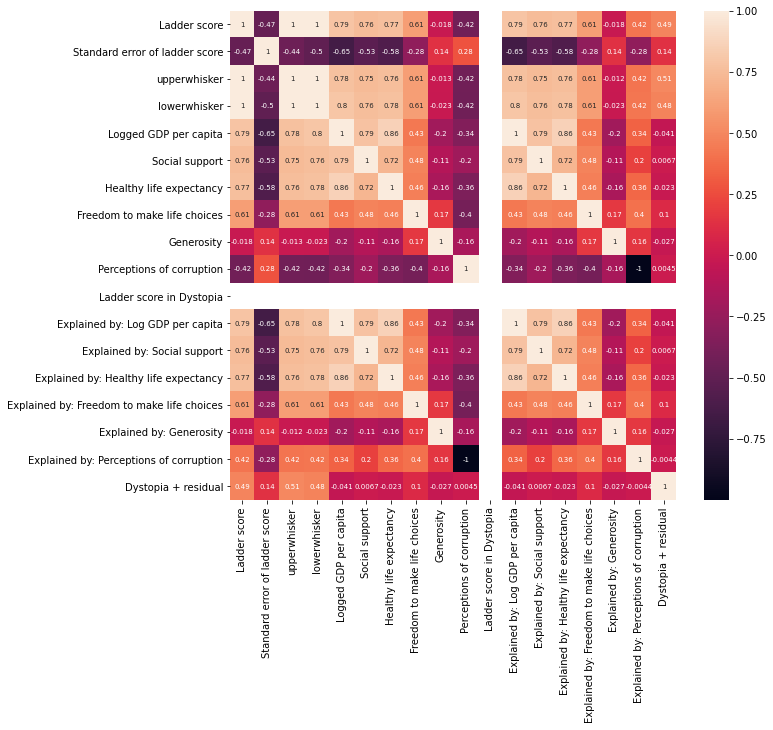

In [196]:
plt.figure(figsize = (10,9))
sns.heatmap(df2021.corr(), annot=True, annot_kws={'size' : 7});

In [197]:
df2021.rename(columns={"Country name":"country"}, inplace=True)
df2021.head(5)

,country,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [198]:
print(list(df2021.columns))

['country', 'Regional indicator', 'Ladder score', 'Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Ladder score in Dystopia', 'Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Dystopia + residual']


In [199]:
df2021.head()

,country,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [200]:
df_population = pd.read_csv('2021_population.csv')
df_continent = pd.read_csv('continents2.csv')
print(list(df_population.columns))
print(list(df_continent.columns))

['iso_code', 'country', '2021_last_updated', '2020_population', 'area', 'density_sq_km', 'growth_rate', 'world_%', 'rank']
['name', 'alpha-2', 'alpha-3', 'country-code', 'iso_3166-2', 'region', 'sub-region', 'intermediate-region', 'region-code', 'sub-region-code', 'intermediate-region-code']


In [201]:
df_population

,iso_code,country,2021_last_updated,2020_population,area,density_sq_km,growth_rate,world_%,rank
0,CHN,China,"1,443,813,474","1,439,323,776","9,706,961 sq_km",149/sq_km,0.34%,18.34%,1
1,IND,India,"1,392,292,448","1,380,004,385","3,287,590 sq_km",424/sq_km,0.97%,17.69%,2
2,USA,United States,"332,753,502","331,002,651","9,372,610 sq_km",36/sq_km,0.58%,4.23%,3
3,IDN,Indonesia,"276,125,016","273,523,615","1,904,569 sq_km",145/sq_km,1.04%,3.51%,4
4,PAK,Pakistan,"224,843,141","220,892,340","881,912 sq_km",255/sq_km,1.95%,2.86%,5
...,...,...,...,...,...,...,...,...,...
224,MSR,Montserrat,"4,977","4,992",102 sq_km,49/sq_km,-0.30%,0.00%,228
225,FLK,Falkland Islands,"3,533","3,480","12,173 sq_km",0/sq_km,1.52%,0.00%,229
226,NIU,Niue,"1,619","1,626",260 sq_km,6/sq_km,-0.43%,0.00%,230
227,TKL,Tokelau,"1,373","1,357",12 sq_km,114/sq_km,1.18%,0.00%,231


In [202]:
df_continent

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF,Oceania,Polynesia,NaN,9.0,61.0,NaN
245,Western Sahara,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa,NaN,2.0,15.0,NaN
246,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,NaN,142.0,145.0,NaN
247,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0


In [203]:
df_continent.rename(columns={"alpha-3":"iso_code"}, inplace=True)

In [204]:
print(list(df_continent.columns))

['name', 'alpha-2', 'iso_code', 'country-code', 'iso_3166-2', 'region', 'sub-region', 'intermediate-region', 'region-code', 'sub-region-code', 'intermediate-region-code']


In [205]:
df_population = df_population.merge(df_continent, on='iso_code')[['iso_code','country','region','sub-region','2021_last_updated','rank']]

In [206]:
df_population

,iso_code,country,region,sub-region,2021_last_updated,rank
0,CHN,China,Asia,Eastern Asia,"1,443,813,474",1
1,IND,India,Asia,Southern Asia,"1,392,292,448",2
2,USA,United States,Americas,Northern America,"332,753,502",3
3,IDN,Indonesia,Asia,South-eastern Asia,"276,125,016",4
4,PAK,Pakistan,Asia,Southern Asia,"224,843,141",5
...,...,...,...,...,...,...
222,MSR,Montserrat,Americas,Latin America and the Caribbean,"4,977",228
223,FLK,Falkland Islands,Americas,Latin America and the Caribbean,"3,533",229
224,NIU,Niue,Oceania,Polynesia,"1,619",230
225,TKL,Tokelau,Oceania,Polynesia,"1,373",231


In [207]:
df_population.country.value_counts()

Australia          1
Venezuela          1
Oman               1
Gambia             1
Sierra Leone       1
                  ..
Argentina          1
Burundi            1
Solomon Islands    1
Botswana           1
Austria            1
Name: country, Length: 227, dtype: int64

In [208]:
df2021.country.value_counts()

Australia                   1
Taiwan Province of China    1
Sierra Leone                1
Bulgaria                    1
Morocco                     1
                           ..
Bangladesh                  1
Colombia                    1
Philippines                 1
Mauritania                  1
Austria                     1
Name: country, Length: 149, dtype: int64

In [209]:
d1 = df_population.country.value_counts().index
d1

Index(['Australia', 'Venezuela', 'Oman', 'Gambia', 'Sierra Leone',
       'French Polynesia', 'Greece', 'Tanzania', 'India', 'Fiji',
       ...
       'Dr Congo', 'Saint Lucia', 'Ghana', 'Hungary', 'Spain', 'Argentina',
       'Burundi', 'Solomon Islands', 'Botswana', 'Austria'],
      dtype='object', length=227)

In [210]:
d2 = df2021.country.value_counts().index
d2

Index(['Australia', 'Taiwan Province of China', 'Sierra Leone', 'Bulgaria',
       'Morocco', 'Kazakhstan', 'Slovakia', 'Kosovo', 'Hungary', 'Afghanistan',
       ...
       'Ecuador', 'Russia', 'Jordan', 'Laos', 'Belgium', 'Bangladesh',
       'Colombia', 'Philippines', 'Mauritania', 'Austria'],
      dtype='object', length=149)

In [211]:
list(set(d2)-set(d1))

['Palestinian Territories',
 'North Cyprus',
 'Kosovo',
 'Congo (Brazzaville)',
 'Hong Kong S.A.R. of China',
 'Bosnia and Herzegovina',
 'Taiwan Province of China']

In [212]:
print(list(df_population.columns))

['iso_code', 'country', 'region', 'sub-region', '2021_last_updated', 'rank']


In [213]:
df2021.head()

,country,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [214]:
print(list(df2021))

['country', 'Regional indicator', 'Ladder score', 'Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Ladder score in Dystopia', 'Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Dystopia + residual']


In [215]:
df_new = df2021.merge(df_population, on='country')[['country','Ladder score','Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption','iso_code', '2021_last_updated', 'rank','region', 'sub-region']]
print(list(df_new))

['country', 'Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'iso_code', '2021_last_updated', 'rank', 'region', 'sub-region']


In [216]:
df_new.head()

,country,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,iso_code,2021_last_updated,rank,region,sub-region
0,Finland,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,FIN,"5,547,690",117,Europe,Northern Europe
1,Denmark,7.620,10.933,0.954,72.7,0.946,0.030,0.179,DNK,"5,811,532",115,Europe,Northern Europe
2,Switzerland,7.571,11.117,0.942,74.4,0.919,0.025,0.292,CHE,"8,710,256",100,Europe,Western Europe
3,Iceland,7.554,10.878,0.983,73.0,0.955,0.160,0.673,ISL,"343,170",180,Europe,Northern Europe
4,Netherlands,7.464,10.932,0.942,72.4,0.913,0.175,0.338,NLD,"17,169,962",70,Europe,Western Europe


In [217]:
df_new.shape

(142, 13)

In [218]:
top_10 = df_new.groupby('country')['Ladder score'].mean().sort_values(ascending=False)[:10]
top_10

country
Finland        7.842
Denmark        7.620
Switzerland    7.571
Iceland        7.554
Netherlands    7.464
Norway         7.392
Sweden         7.363
Luxembourg     7.324
New Zealand    7.277
Austria        7.268
Name: Ladder score, dtype: float64

In [219]:
figbahagia = px.line(top_10)
figbahagia.update_layout(
    title={
        'text': "10 Negara Paling Bahagia",
        'y':0.95,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="Negara")

In [220]:
last_10 = df_new.groupby('country')['Ladder score'].mean().sort_values(ascending=True)[:10]
last_10

country
Afghanistan    2.523
Zimbabwe       3.145
Rwanda         3.415
Botswana       3.467
Lesotho        3.512
Malawi         3.600
Haiti          3.615
Tanzania       3.623
Yemen          3.658
Burundi        3.775
Name: Ladder score, dtype: float64

In [221]:
figtidakbahagia = px.line(last_10)
figtidakbahagia.update_layout(
    title={
        'text': "10 Negara Tidak Bahagia",
        'y':0.95,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="Negara")

In [222]:
top_gdp = df_new.groupby('country')['Logged GDP per capita'].mean().sort_values(ascending=False)[:10]
top_gdp

country
Luxembourg              11.647
Singapore               11.488
Ireland                 11.342
Switzerland             11.117
United Arab Emirates    11.085
Norway                  11.053
United States           11.023
Denmark                 10.933
Netherlands             10.932
Austria                 10.906
Name: Logged GDP per capita, dtype: float64

In [223]:
px.line(top_gdp)

In [224]:
last_gdp = df_new.groupby('country')['Logged GDP per capita'].mean().sort_values(ascending=True)[:10]
last_gdp

country
Burundi         6.635
Malawi          6.958
Niger           7.098
Mozambique      7.158
Liberia         7.288
Togo            7.362
Chad            7.364
Madagascar      7.396
Sierra Leone    7.434
Haiti           7.477
Name: Logged GDP per capita, dtype: float64

In [225]:
px.line(last_gdp)

In [226]:
top_socialsupport = df_new.groupby('country')['Social support'].mean().sort_values(ascending=False)[:10]
top_socialsupport

country
Turkmenistan      0.983
Iceland           0.983
Finland           0.954
Denmark           0.954
Norway            0.954
Kazakhstan        0.952
New Zealand       0.948
Slovenia          0.948
Ireland           0.947
Czech Republic    0.947
Name: Social support, dtype: float64

In [227]:
px.line(top_socialsupport)

In [228]:
last_socialsupport = df_new.groupby('country')['Social support'].mean().sort_values(ascending=True)[:10]
last_socialsupport

country
Afghanistan    0.463
Benin          0.489
Burundi        0.490
Malawi         0.537
Haiti          0.540
Rwanda         0.552
Morocco        0.560
Togo           0.569
India          0.603
Chad           0.619
Name: Social support, dtype: float64

In [229]:
px.line(last_socialsupport)

In [230]:
top_healthy = df_new.groupby('country')['Healthy life expectancy'].mean().sort_values(ascending=False)[:10]
top_healthy

country
Singapore      76.953
Japan          75.100
Spain          74.700
Switzerland    74.400
France         74.000
South Korea    73.900
Australia      73.900
Cyprus         73.898
Italy          73.800
Canada         73.800
Name: Healthy life expectancy, dtype: float64

In [231]:
px.line(top_healthy)

In [232]:
last_healthy = df_new.groupby('country')['Healthy life expectancy'].mean().sort_values(ascending=True)[:10]
last_healthy

country
Chad            48.478
Lesotho         48.700
Nigeria         50.102
Ivory Coast     50.114
Swaziland       50.833
Sierra Leone    51.651
Mali            51.969
Afghanistan     52.493
Burundi         53.400
Cameroon        53.515
Name: Healthy life expectancy, dtype: float64

In [233]:
px.line(last_healthy)

In [234]:
top_freedom = df_new.groupby('country')['Freedom to make life choices'].mean().sort_values(ascending=False)[:10]
top_freedom

country
Uzbekistan    0.970
Norway        0.960
Cambodia      0.959
Iceland       0.955
Slovenia      0.949
Finland       0.949
Denmark       0.946
Sweden        0.945
Vietnam       0.940
Kyrgyzstan    0.935
Name: Freedom to make life choices, dtype: float64

In [235]:
px.line(top_freedom)

In [236]:
last_freedom = df_new.groupby('country')['Freedom to make life choices'].mean().sort_values(ascending=True)[:10]
last_freedom

country
Afghanistan    0.382
Algeria        0.480
Lebanon        0.525
Comoros        0.548
Madagascar     0.552
Mauritania     0.561
Turkey         0.576
Chad           0.579
Greece         0.582
Haiti          0.593
Name: Freedom to make life choices, dtype: float64

In [237]:
px.line(last_freedom)

In [238]:
top_generosity = df_new.groupby('country')['Generosity'].mean().sort_values(ascending=False)[:10]
top_generosity

country
Indonesia         0.542
Myanmar           0.509
Gambia            0.424
Haiti             0.422
Uzbekistan        0.311
Kenya             0.287
Thailand          0.287
Turkmenistan      0.273
United Kingdom    0.233
Iran              0.218
Name: Generosity, dtype: float64

In [239]:
px.line(top_generosity)

In [240]:
last_generosity = df_new.groupby('country')['Generosity'].mean().sort_values(ascending=True)[:10]
last_generosity

country
Greece           -0.288
Japan            -0.258
Botswana         -0.246
Portugal         -0.244
Georgia          -0.238
Morocco          -0.236
Azerbaijan       -0.223
Romania          -0.219
Czech Republic   -0.208
Lithuania        -0.203
Name: Generosity, dtype: float64

In [241]:
px.line(last_generosity)

In [242]:
top_corrup = df_new.groupby('country')['Perceptions of corruption'].mean().sort_values(ascending=False)[:10]
top_corrup

country
Croatia            0.939
Romania            0.938
Bulgaria           0.932
Afghanistan        0.924
Ukraine            0.924
Moldova            0.918
Lesotho            0.915
Slovakia           0.911
Kyrgyzstan         0.908
North Macedonia    0.905
Name: Perceptions of corruption, dtype: float64

In [243]:
px.line(top_corrup)

In [244]:
last_corrup = df_new.groupby('country')['Perceptions of corruption'].mean().sort_values(ascending=True)[:10]
last_corrup

country
Singapore      0.082
Rwanda         0.167
Denmark        0.179
Finland        0.186
Sweden         0.237
New Zealand    0.242
Norway         0.270
Switzerland    0.292
Netherlands    0.338
Ireland        0.363
Name: Perceptions of corruption, dtype: float64

In [245]:
px.line(last_corrup)

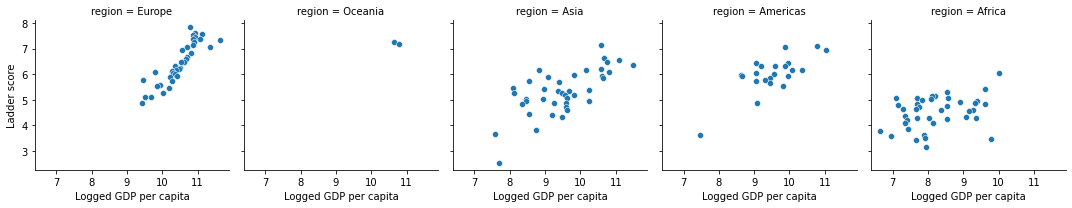

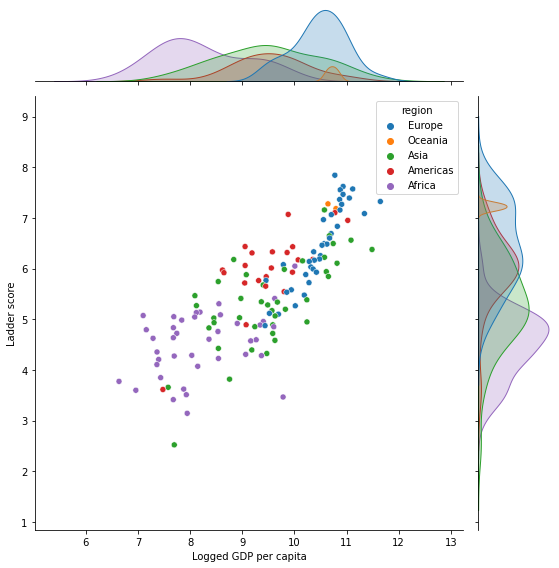

In [246]:
region_gdp2 = sns.FacetGrid(df_new, col = "region")
region_gdp2.map(sns.scatterplot, 'Logged GDP per capita', 'Ladder score')
region_gdp2.tight_layout();
sns.jointplot(x = 'Logged GDP per capita', y = 'Ladder score', data = df_new, hue = 'region', height =8);

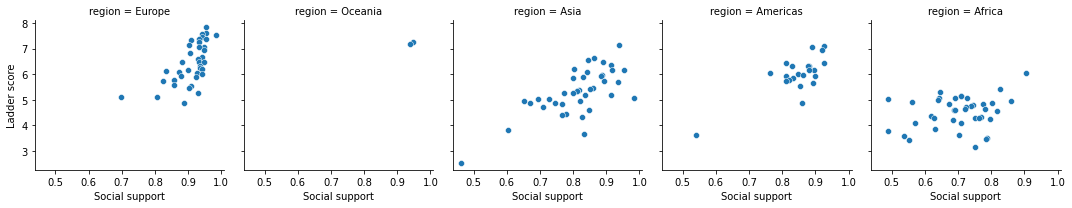

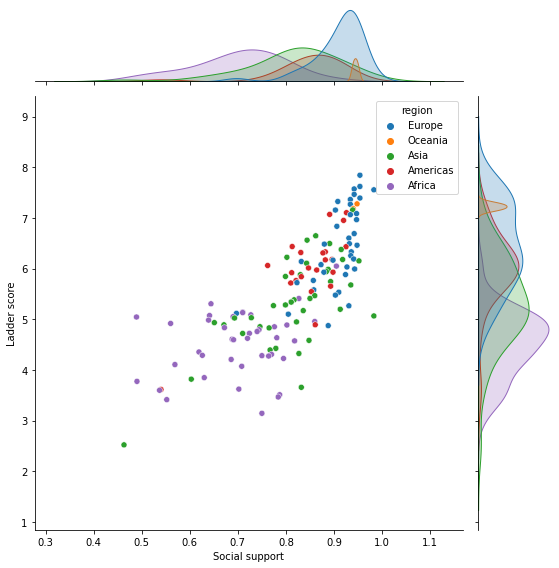

In [247]:
region_social = sns.FacetGrid(df_new, col = "region")
region_social.map(sns.scatterplot, 'Social support', 'Ladder score')
region_social.tight_layout();
sns.jointplot(x = 'Social support', y = 'Ladder score', data = df_new, hue = 'region', height =8);

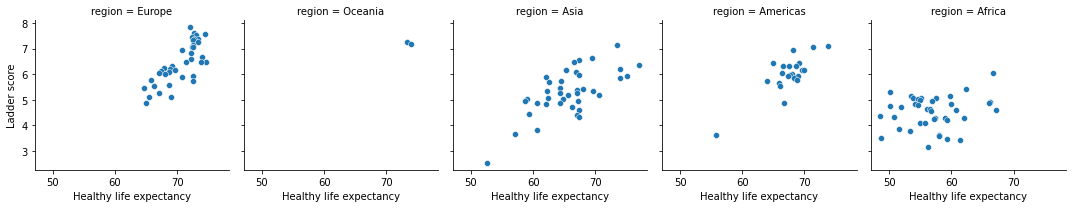

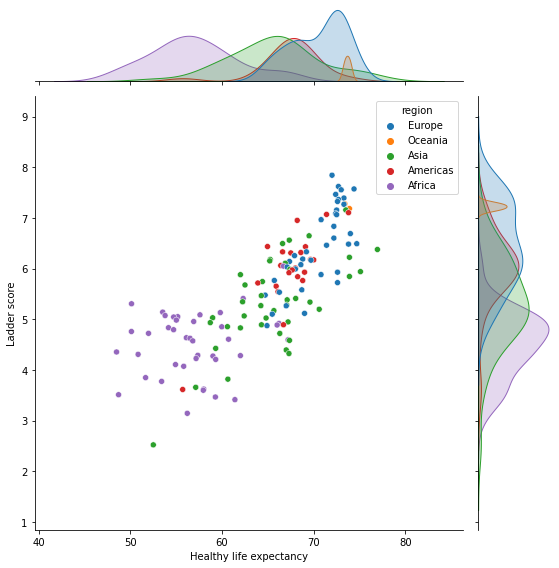

In [248]:
region_life = sns.FacetGrid(df_new, col = "region")
region_life.map(sns.scatterplot, 'Healthy life expectancy', 'Ladder score')
region_life.tight_layout();
sns.jointplot(x = 'Healthy life expectancy', y = 'Ladder score', data = df_new, hue = 'region', height =8);

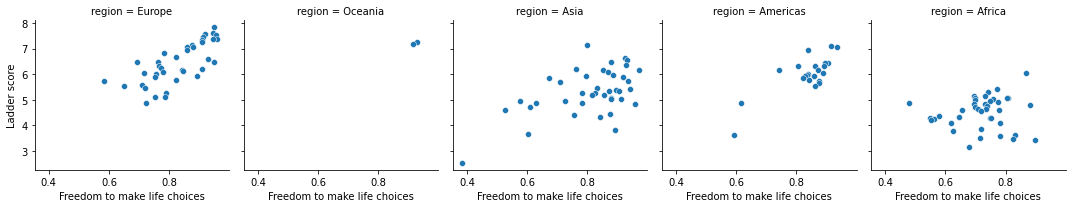

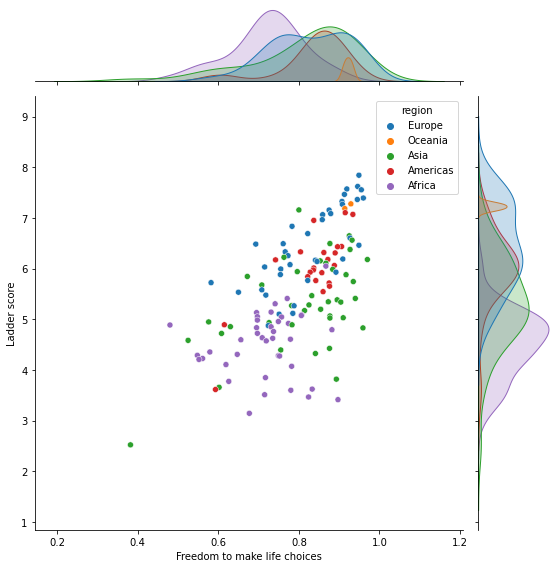

In [249]:
region_freedom = sns.FacetGrid(df_new, col = "region")
region_freedom.map(sns.scatterplot, 'Freedom to make life choices', 'Ladder score')
region_freedom.tight_layout();
sns.jointplot(x = 'Freedom to make life choices', y = 'Ladder score', data = df_new, hue = 'region', height =8);

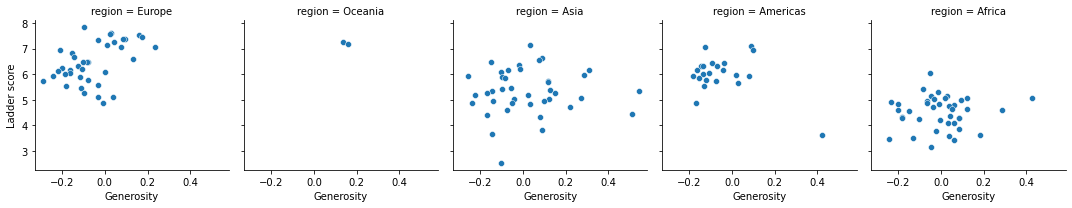

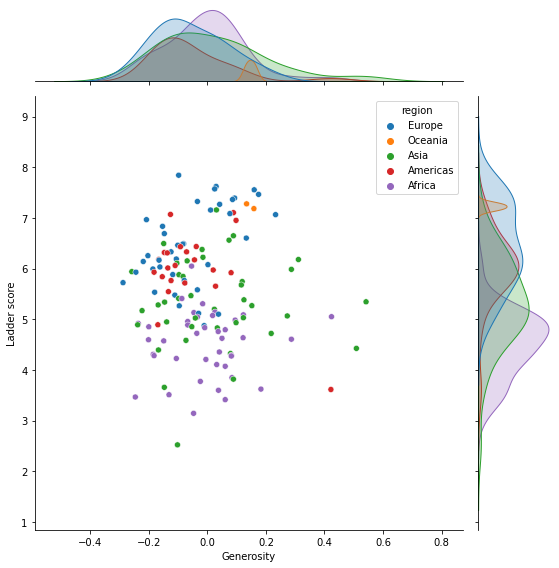

In [250]:
region_generosity = sns.FacetGrid(df_new, col = "region")
region_generosity.map(sns.scatterplot, 'Generosity', 'Ladder score')
region_generosity.tight_layout();
sns.jointplot(x = 'Generosity', y = 'Ladder score', data = df_new, hue = 'region', height =8);

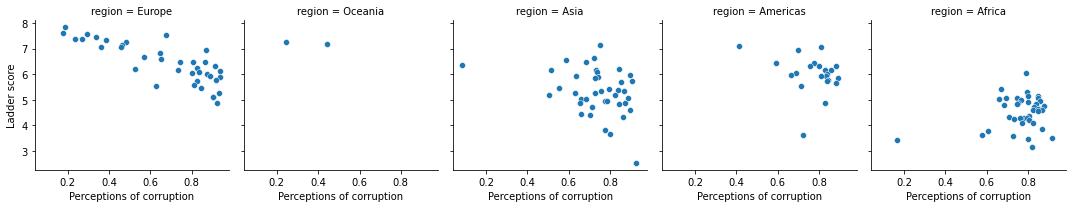

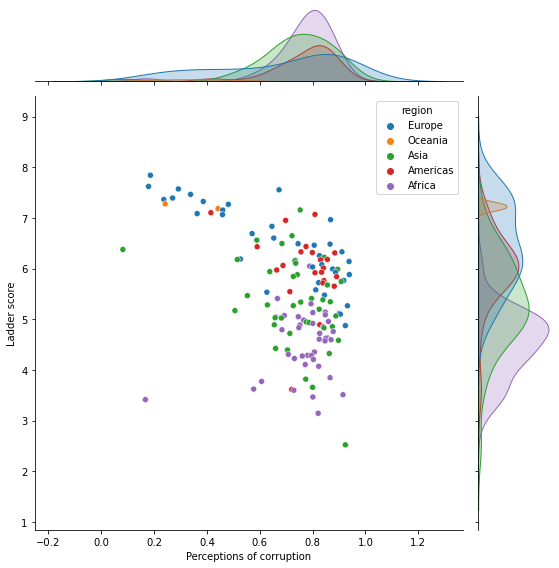

In [251]:
region_corrup = sns.FacetGrid(df_new, col = "region")
region_corrup.map(sns.scatterplot, 'Perceptions of corruption', 'Ladder score')
region_corrup.tight_layout();
sns.jointplot(x = 'Perceptions of corruption', y = 'Ladder score', data = df_new, hue = 'region', height =8);

In [252]:
df_new['sub-region'].unique()

array(['Northern Europe', 'Western Europe', 'Australia and New Zealand',
       'Western Asia', 'Northern America',
       'Latin America and the Caribbean', 'Eastern Europe',
       'Southern Europe', 'South-eastern Asia', 'Central Asia',
       'Sub-Saharan Africa', 'Eastern Asia', 'Northern Africa',
       'Southern Asia'], dtype=object)

In [253]:
sub_regLadder = df_new[['region','sub-region','Ladder score']].groupby(['region','sub-region']).agg(['count','mean','max','min','median'])
sub_regLadder.columns = ['{}_{}'.format(col[0], col[1]) for col in sub_regLadder.columns]
#pd.set_option('display.max_rows', None)
sub_regLadder.reset_index(inplace=True)
sub_regLadder

,region,sub-region,Ladder score_count,Ladder score_mean,Ladder score_max,Ladder score_min,Ladder score_median
0,Africa,Northern Africa,5,4.818800,5.410,4.283,4.8870
1,Africa,Sub-Saharan Africa,35,4.470257,6.049,3.145,4.6070
2,Americas,Latin America and the Caribbean,20,5.908050,7.069,3.615,5.9920
3,Americas,Northern America,2,7.027000,7.103,6.951,7.0270
4,Asia,Central Asia,5,5.721400,6.179,5.066,5.7440
5,Asia,Eastern Asia,4,5.700250,5.940,5.339,5.7610
6,Asia,South-eastern Asia,9,5.407556,6.377,4.426,5.3840
7,Asia,Southern Asia,8,4.476750,5.269,2.523,4.8275
8,Asia,Western Asia,14,5.498000,7.157,3.658,5.2270
9,Europe,Eastern Europe,10,5.851200,6.965,4.875,5.8790


In [254]:
rata = df_new.groupby('sub-region')['Ladder score'].mean().sort_values(ascending=True)
rata

sub-region
Sub-Saharan Africa                 4.470257
Southern Asia                      4.476750
Northern Africa                    4.818800
South-eastern Asia                 5.407556
Western Asia                       5.498000
Eastern Asia                       5.700250
Central Asia                       5.721400
Eastern Europe                     5.851200
Latin America and the Caribbean    5.908050
Southern Europe                    5.949818
Northern America                   7.027000
Northern Europe                    7.039600
Western Europe                     7.186571
Australia and New Zealand          7.230000
Name: Ladder score, dtype: float64

In [255]:
fig1 = px.bar(sub_regLadder, x=rata.values, y=rata.index, labels={'y':'Wilayah', 'x':'Rata-Rata Kebahagiaan'}, text=rata.values)
fig1.update_traces(texttemplate='%{text:.3s}', textposition='auto')
fig1.update_layout(title={
        'text': "Rata-Rata Kebahagiaan di Setiap Wilayah",
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

In [256]:
px.treemap(df_new, path=[px.Constant('world'), 'region', 'country'], values='Logged GDP per capita',
                  color='Ladder score', hover_data=['Healthy life expectancy','Social support', 'Freedom to make life choices',
                                                    'Generosity', 'Perceptions of corruption'], color_continuous_scale='RdBu')

In [257]:
df_new.loc[df_new['region'] == 'Oceania']

,country,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,iso_code,2021_last_updated,rank,region,sub-region
8,New Zealand,7.277,10.643,0.948,73.4,0.929,0.134,0.242,NZL,"4,857,384",126,Oceania,Australia and New Zealand
10,Australia,7.183,10.796,0.940,73.9,0.914,0.159,0.442,AUS,"25,763,941",55,Oceania,Australia and New Zealand


In [258]:
print(list(df_new))

['country', 'Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'iso_code', '2021_last_updated', 'rank', 'region', 'sub-region']


In [259]:
df_new

,country,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,iso_code,2021_last_updated,rank,region,sub-region
0,Finland,7.842,10.775,0.954,72.000,0.949,-0.098,0.186,FIN,"5,547,690",117,Europe,Northern Europe
1,Denmark,7.620,10.933,0.954,72.700,0.946,0.030,0.179,DNK,"5,811,532",115,Europe,Northern Europe
2,Switzerland,7.571,11.117,0.942,74.400,0.919,0.025,0.292,CHE,"8,710,256",100,Europe,Western Europe
3,Iceland,7.554,10.878,0.983,73.000,0.955,0.160,0.673,ISL,"343,170",180,Europe,Northern Europe
4,Netherlands,7.464,10.932,0.942,72.400,0.913,0.175,0.338,NLD,"17,169,962",70,Europe,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Lesotho,3.512,7.926,0.787,48.700,0.715,-0.131,0.915,LSO,"2,157,648",147,Africa,Sub-Saharan Africa
138,Botswana,3.467,9.782,0.784,59.269,0.824,-0.246,0.801,BWA,"2,393,525",145,Africa,Sub-Saharan Africa
139,Rwanda,3.415,7.676,0.552,61.400,0.897,0.061,0.167,RWA,"13,249,711",76,Africa,Sub-Saharan Africa
140,Zimbabwe,3.145,7.943,0.750,56.201,0.677,-0.047,0.821,ZWE,"15,072,709",74,Africa,Sub-Saharan Africa


In [260]:
df_new.loc[df_new['rank'] == 1]

,country,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,iso_code,2021_last_updated,rank,region,sub-region
77,China,5.339,9.673,0.811,69.593,0.904,-0.146,0.755,CHN,"1,443,813,474",1,Asia,Eastern Asia


In [261]:
df_new.loc[df_new['country'] == 'Indonesia']

,country,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,iso_code,2021_last_updated,rank,region,sub-region
76,Indonesia,5.345,9.365,0.811,62.236,0.873,0.542,0.867,IDN,"276,125,016",4,Asia,South-eastern Asia


In [262]:
#pop_10 = df_new.groupby('country')['rank'].sum().sort_values(ascending=True)[:10]
pop_10 = df_new[['country','2021_last_updated','rank','Ladder score']].sort_values(['rank'], ascending=[True])[:10]
pop_10
#df.sort_values(['b', 'c'], ascending=[True, False],

,country,2021_last_updated,rank,Ladder score
77,China,"1,443,813,474",1,5.339
131,India,"1,392,292,448",2,3.819
18,United States,"332,753,502",3,6.951
76,Indonesia,"276,125,016",4,5.345
98,Pakistan,"224,843,141",5,4.934
32,Brazil,"213,874,810",6,6.330
109,Nigeria,"210,961,650",7,4.759
94,Bangladesh,"166,170,099",8,5.025
71,Russia,"145,913,731",9,5.477
33,Mexico,"130,151,446",10,6.317


In [263]:
pop_10.sort_values(['Ladder score'], ascending=[False])

,country,2021_last_updated,rank,Ladder score
18,United States,"332,753,502",3,6.951
32,Brazil,"213,874,810",6,6.330
33,Mexico,"130,151,446",10,6.317
71,Russia,"145,913,731",9,5.477
76,Indonesia,"276,125,016",4,5.345
77,China,"1,443,813,474",1,5.339
94,Bangladesh,"166,170,099",8,5.025
98,Pakistan,"224,843,141",5,4.934
109,Nigeria,"210,961,650",7,4.759
131,India,"1,392,292,448",2,3.819


In [264]:
#px.set_mapbox_access_token(open(".mapbox_token").read())

fig2 = px.bar(pop_10, x="country", y="Ladder score", text="Ladder score",
             labels={
                     'country': 'Negara'
             }).update_xaxes()
fig2.update_traces(texttemplate='%{text:.3s}', textposition='inside')
fig2.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', title={
        'text': "Tingkat Kebahagiaan dengan Populasi Terbanyak",
        'y':0.97,
        'x':0.43,
        'xanchor': 'center',
        'yanchor': 'top'})
fig2.show()

In [265]:
df_new

,country,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,iso_code,2021_last_updated,rank,region,sub-region
0,Finland,7.842,10.775,0.954,72.000,0.949,-0.098,0.186,FIN,"5,547,690",117,Europe,Northern Europe
1,Denmark,7.620,10.933,0.954,72.700,0.946,0.030,0.179,DNK,"5,811,532",115,Europe,Northern Europe
2,Switzerland,7.571,11.117,0.942,74.400,0.919,0.025,0.292,CHE,"8,710,256",100,Europe,Western Europe
3,Iceland,7.554,10.878,0.983,73.000,0.955,0.160,0.673,ISL,"343,170",180,Europe,Northern Europe
4,Netherlands,7.464,10.932,0.942,72.400,0.913,0.175,0.338,NLD,"17,169,962",70,Europe,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Lesotho,3.512,7.926,0.787,48.700,0.715,-0.131,0.915,LSO,"2,157,648",147,Africa,Sub-Saharan Africa
138,Botswana,3.467,9.782,0.784,59.269,0.824,-0.246,0.801,BWA,"2,393,525",145,Africa,Sub-Saharan Africa
139,Rwanda,3.415,7.676,0.552,61.400,0.897,0.061,0.167,RWA,"13,249,711",76,Africa,Sub-Saharan Africa
140,Zimbabwe,3.145,7.943,0.750,56.201,0.677,-0.047,0.821,ZWE,"15,072,709",74,Africa,Sub-Saharan Africa


In [266]:
southeastern_asians = df_new[df_new['sub-region'] == 'South-eastern Asia']
southeastern_asians = southeastern_asians.sort_values('Ladder score', ascending=False)
southeastern_asians.groupby(['country','Logged GDP per capita']).mean()
southeastern_asians

,country,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,iso_code,2021_last_updated,rank,region,sub-region
30,Singapore,6.377,11.488,0.915,76.953,0.927,-0.018,0.082,SGP,"5,892,666",114,Asia,South-eastern Asia
51,Thailand,5.985,9.805,0.888,67.401,0.884,0.287,0.895,THA,"69,938,302",20,Asia,South-eastern Asia
58,Philippines,5.880,9.076,0.830,62.000,0.917,-0.097,0.742,PHL,"110,924,509",13,Asia,South-eastern Asia
73,Vietnam,5.411,8.973,0.850,68.034,0.940,-0.098,0.796,VNM,"98,100,002",15,Asia,South-eastern Asia
75,Malaysia,5.384,10.238,0.817,67.102,0.895,0.125,0.839,MYS,"32,742,387",45,Asia,South-eastern Asia
76,Indonesia,5.345,9.365,0.811,62.236,0.873,0.542,0.867,IDN,"276,125,016",4,Asia,South-eastern Asia
93,Laos,5.030,8.947,0.728,58.968,0.910,0.123,0.658,LAO,"7,370,800",105,Asia,South-eastern Asia
107,Cambodia,4.830,8.360,0.765,62.000,0.959,0.034,0.843,KHM,"16,927,555",71,Asia,South-eastern Asia
118,Myanmar,4.426,8.541,0.779,59.302,0.876,0.509,0.660,MMR,"54,773,271",27,Asia,South-eastern Asia


In [267]:
px.bar(southeastern_asians, x='country', y='Ladder score',
             hover_data=['Logged GDP per capita'], color='Logged GDP per capita',
             height=400, labels={
                     "country": "Negara",
                     "Ladder score": "Tingkat Kebahagiaan",
                     "Logged GDP per capita" : "Tingkat Pendapatan"
             })

In [268]:
mostbest_10 = df_new.sort_values('Ladder score', ascending=False).head(10).mean()[1:7]
mostbest_10 = pd.DataFrame(mostbest_10)
mostbest_10 = mostbest_10.rename(columns = {0:'Best 10'})
mostbest_10

,Best 10
Logged GDP per capita,10.9751
Social support,0.9453
Healthy life expectancy,72.9800
Freedom to make life choices,0.9331
Generosity,0.0613
Perceptions of corruption,0.3284


In [269]:
indo = df_new.loc[df_new['country'] == 'Indonesia'].mean()[1:7]
indo = pd.DataFrame(indo)
indo = indo.rename(columns = {0:'Indonesia'})
indo

,Indonesia
Logged GDP per capita,9.365
Social support,0.811
Healthy life expectancy,62.236
Freedom to make life choices,0.873
Generosity,0.542
Perceptions of corruption,0.867


In [270]:
mostworst_10 = df_new.sort_values('Ladder score', ascending=True).mean()[1:7]
mostworst_10 = pd.DataFrame(mostworst_10)
mostworst_10 = mostworst_10.rename(columns = {0:'Worst 10'})
mostworst_10

,Worst 10
Logged GDP per capita,9.418606
Social support,0.814718
Healthy life expectancy,64.867796
Freedom to make life choices,0.793866
Generosity,-0.016923
Perceptions of corruption,0.726944


In [271]:
fix = mostbest_10.join(indo)
fix = fix.join(mostworst_10)
fix

,Best 10,Indonesia,Worst 10
Logged GDP per capita,10.9751,9.365,9.418606
Social support,0.9453,0.811,0.814718
Healthy life expectancy,72.9800,62.236,64.867796
Freedom to make life choices,0.9331,0.873,0.793866
Generosity,0.0613,0.542,-0.016923
Perceptions of corruption,0.3284,0.867,0.726944


In [272]:
import plotly.graph_objects as go

criteria = ['Dukungan Sosial','Kebebasan Pilihan Hidup','Kemurahan Hati','Persepsi Terhadap Korupsi']

fig3 = go.Figure()
fig3.add_trace(go.Bar(x=criteria,
                y=[0.94, 0.93, 0.06, 0.32],
                name='10 Negara Bahagia',
                marker_color='rgb(55, 83, 109)'
                ))
fig3.add_trace(go.Bar(x=criteria,
                y=[0.81, 0.87, 0.54, 0.86],
                name='Indonesia',
                marker_color='rgb(242, 215, 74)'
                ))
fig3.add_trace(go.Bar(x=criteria,
                y=[0.81, 0.79, -0.01, 0.72],
                name='10 Negara Tidak Bahagia',
                marker_color='rgb(126, 18, 25)'
                ))

fig3.update_layout(
    title='Kriteria untuk Menaikkan Tingkat Kebahagiaan',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Numbers',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=1.0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig3.show()

In [273]:
df2021.shape

(149, 20)

In [274]:
df_new.shape

(142, 13)